In [1]:
import numpy as np
from struct_env.zayas_env import Zayas
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook

# Initializing the environment

In [2]:
env_ = Zayas()

## Computing failure probabilities due to fatigue (do-nothing action)

In [3]:
action = {}
for i in range(13):
    action[env_.agent_list[i]] = 0
action

{'agent_0': 0,
 'agent_1': 0,
 'agent_2': 0,
 'agent_3': 0,
 'agent_4': 0,
 'agent_5': 0,
 'agent_6': 0,
 'agent_7': 0,
 'agent_8': 0,
 'agent_9': 0,
 'agent_10': 0,
 'agent_11': 0,
 'agent_12': 0}

In [4]:
_ = env_.reset()
rew_total_ = 0
done_ = 0
pf_fatigue = []
while not done_:
    [bel_, rew_, done_, _] = env_.step(action)
    # print(rew_)
    pf_fat = env_.beliefs[0, -1]
    print(pf_fat)
    pf_fatigue.append(pf_fat)
    rew_total_ += rew_['agent_0']
rew_total_

2e-07
5.899999999999999e-06
4.15e-05
0.00014199999999999998
0.00034869999999999996
0.0007072999999999999
0.0012228
0.0019351000000000001
0.0028618999999999997
0.003982899999999999
0.0053387999999999994
0.006916599999999999
0.0087143
0.0107164
0.0129131
0.015295
0.017865
0.0206046
0.023503700000000002
0.026553700000000003
0.0297565
0.0330791
0.0365621
0.0401212
0.0437738
0.0475335
0.0514035
0.0553243
0.0593539
0.063436


-304.1933924772498

In [6]:
pf_fatigue

[2e-07,
 5.899999999999999e-06,
 4.15e-05,
 0.00014199999999999998,
 0.00034869999999999996,
 0.0007072999999999999,
 0.0012228,
 0.0019351000000000001,
 0.0028618999999999997,
 0.003982899999999999,
 0.0053387999999999994,
 0.006916599999999999,
 0.0087143,
 0.0107164,
 0.0129131,
 0.015295,
 0.017865,
 0.0206046,
 0.023503700000000002,
 0.026553700000000003,
 0.0297565,
 0.0330791,
 0.0365621,
 0.0401212,
 0.0437738,
 0.0475335,
 0.0514035,
 0.0553243,
 0.0593539,
 0.063436]

## Option 2: based on robustness index

In [9]:
def pf_sys_energies(pf_fatigue, energy_intensity):
    pf_sys_ener = np.zeros(env_.n_elem)
    for i in range(env_.n_elem):
        energy = np.zeros(env_.n_elem)
        pf_brace = np.zeros(env_.n_elem)
        pf_fat = np.zeros(env_.n_comp)
        if env_.indZayas[i,1] > 0:
            pf_fat[env_.indZayas[i,0]] = pf_fatigue
            pf_fat[env_.indZayas[i,0] + 1] = pf_fatigue
        else:
            pf_fat[env_.indZayas[i,0]] = pf_fatigue  
        if env_.energy_max_index[i] < 2:
            energy[i] = energy_intensity
            pf_brace = env_.pf_col(energy)
        pf_sys_ener[i] = env_.pf_sys(pf_fat, pf_brace)
    pf_sys_ref = env_.pf_sys(np.zeros(env_.n_comp), np.zeros(env_.n_elem))
    reliab_ref = -norm.ppf(pf_sys_ref)
    reliab_sys_ener = -norm.ppf(pf_sys_ener)
    robust_index = (reliab_ref) / (reliab_ref - reliab_sys_ener)
    return robust_index

In [10]:
pf_fat_loop = [0, pf_fatigue[10], pf_fatigue[29]]

rel_fat_ = np.zeros((3, 5, 13))
for j in range(3):    
    ind = 0
    for energy_ in env_.col_intens:
        rel_fat_[j, ind, :] = pf_sys_energies(pf_fat_loop[j], energy_)
        ind += 1
rel_fat_

C:\Users\user\Anaconda3\envs\gym\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


array([[[4.74593670e+01, 6.17396722e+00, 1.10669243e+02, 1.12797099e+02,
                    inf,            inf,            inf,            inf,
         6.05138174e+02, 2.49470345e+03, 1.55854906e+04, 3.48212639e+02,
                    inf],
        [1.85015766e+01, 3.68403614e+00, 3.95007265e+01, 4.02033933e+01,
                    inf,            inf,            inf,            inf,
         1.19064100e+02, 4.78450644e+02, 5.12224438e+03, 1.17665830e+02,
                    inf],
        [1.46681221e+01, 3.26479205e+00, 3.02487019e+01, 3.07679384e+01,
                    inf,            inf,            inf,            inf,
         7.05483364e+01, 2.77403342e+02, 3.77009223e+03, 8.78510097e+01,
                    inf],
        [1.32566283e+01, 3.09740370e+00, 2.68747082e+01, 2.73274520e+01,
                    inf,            inf,            inf,            inf,
         5.50547877e+01, 2.13280801e+02, 3.27886776e+03, 7.70140539e+01,
                    inf],
        [1.25041348e

In [11]:
rob_index = np.delete(rel_fat_, [4,5,6,7,12], axis = 2)

<IPython.core.display.Javascript object>


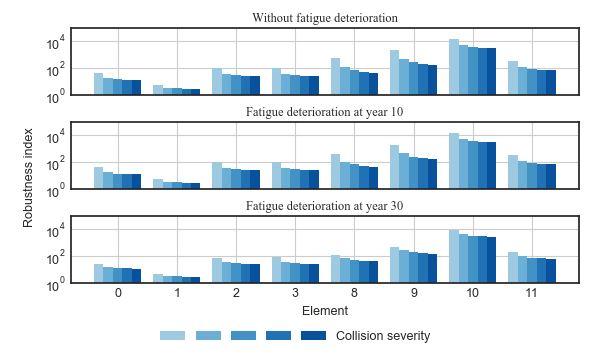

In [15]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 9
plt.style.use('seaborn-white')

barWidth = 0.16
xpos = np.arange(8)
color_ = ['#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
cases_ = ['Without fatigue deterioration', 'Fatigue deterioration at year 10', 'Fatigue deterioration at year 30']
ylims = [1e5, 1e5, 1e5]
fig, ax = plt.subplots( 3 , figsize=(15*cm, 9*cm), sharex=True)

for j in range(3):
    for i in range(5):
        xpos_ = [x + barWidth*i for x in xpos]
        ax[j].bar(xpos_, rob_index[j, i, :], width = barWidth, color = color_[i], label ='IT')
    ax[j].set_title(cases_[j], pad = 4, fontsize = 9, fontfamily = "Times New Roman")
    ax[j].set_yscale('log')
    ax[j].set_ylim(1, ylims[j])
    ax[j].grid()
    ax[j].set_xticks([r + 2*barWidth for r in range(8)])
    ax[j].set_xticklabels([str(i) for i in [0,1,2,3,8,9,10,11]])
    ax[j].set_yticks([1, 1e2, 1e4])

fig.legend(['','','','','Collision severity'], loc=8, ncol=5, columnspacing = 0.01)

fig.text(0.04, 0.5, 'Robustness index', va='center', rotation='vertical')
plt.xlabel('Element')
plt.subplots_adjust(bottom=0.2, top=0.92, left=0.12, right=0.98, hspace = 0.4)
plt.savefig('robustness_plot.pdf')

pfb = np.zeros(13)
pfb[9] = 1
env_.pf_sys(pf_all[1, :], pfb)

pfb = np.zeros(13)
pfb[9] = 0.002
env_.pf_sys(pf_all[1, :], pfb)

### To be stored => pf_fatigue

# Computing reliabilities

In [10]:
def pf_sys_energy(pf_fat, energy_intensity):
    pf_sys_ener = np.zeros(env_.n_elem)
    for i in range(env_.n_elem):
        energy = np.zeros(env_.n_elem)
        pf_brace = np.zeros(env_.n_elem)
        if env_.energy_max_index[i] < 2:
            energy[i] = energy_intensity
            pf_brace = env_.pf_col(energy)
        pf_sys_ener[i] = env_.pf_sys(pf_fat, pf_brace)
    pf_sys_ref = env_.pf_sys(np.zeros(env_.n_comp), np.zeros(env_.n_elem))
    reliab_ref = -norm.ppf(pf_sys_ref)
    reliab_sys_ener = -norm.ppf(pf_sys_ener)
    robust_index = 1 - (reliab_ref - reliab_sys_ener) / (reliab_ref)
    return robust_index

In [11]:
pf_all = np.zeros((3, env_.n_comp))
pf_all[1, :] = np.ones(env_.n_comp)*pf_fatigue[29]
pf_all[2, :] = np.ones(env_.n_comp)*pf_fatigue[29]

rel_fat = np.zeros((3, 5, 13))
for j in range(3):    
    ind = 0
    for energy_ in env_.col_intens:
        rel_fat[j, ind, :] = pf_sys_energy(pf_all[j, :], energy_)
        ind += 1
rel_fat

(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,

array([[[0.98743022, 0.88222805, 0.99473905, 0.99484012, 1.        ,
         1.        , 1.        , 1.        , 0.99970888, 0.99992975,
         0.99996335, 0.99834948, 1.        ],
        [0.95170011, 0.74408348, 0.9777062 , 0.9781013 , 1.        ,
         1.        , 1.        , 1.        , 0.99473363, 0.99870488,
         0.99983071, 0.9925905 , 1.        ],
        [0.93570692, 0.70289284, 0.96911313, 0.96963948, 1.        ,
         1.        , 1.        , 1.        , 0.98894511, 0.99722128,
         0.99975493, 0.98943993, 1.        ],
        [0.92770818, 0.68422049, 0.96460087, 0.96519206, 1.        ,
         1.        , 1.        , 1.        , 0.98466563, 0.99608325,
         0.99971255, 0.98771889, 1.        ],
        [0.92266727, 0.6729392 , 0.96168594, 0.96231762, 1.        ,
         1.        , 1.        , 1.        , 0.98142074, 0.99519666,
         0.99968417, 0.98658259, 1.        ]],

       [[0.64980085, 0.64738019, 0.65737311, 0.6572889 , 0.65784358,
         

## Plotting

<IPython.core.display.Javascript object>


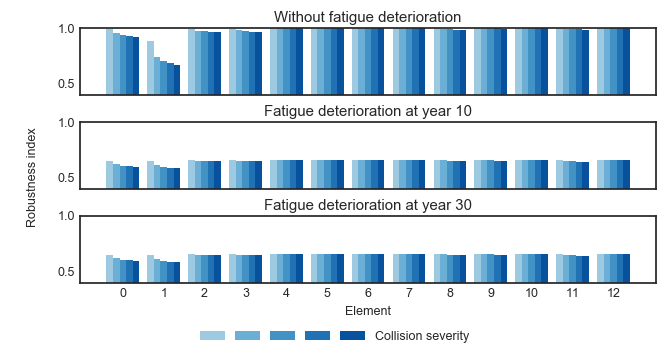

In [12]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 9
plt.style.use('seaborn-white')

barWidth = 0.16
xpos = np.arange(13)
color_ = ['#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
cases_ = ['Without fatigue deterioration', 'Fatigue deterioration at year 10', 'Fatigue deterioration at year 30']
fig, ax = plt.subplots( 3 , figsize=(17*cm, 9*cm), sharex=True,  sharey=True)

for j in range(3):
    for i in range(5):
        xpos_ = [x + barWidth*i for x in xpos]
        ax[j].bar(xpos_, rel_fat[j, i, :], width = barWidth, color = color_[i], label ='IT')
    ax[j].set_title(cases_[j], pad = 4)
    ax[j].set_ylim(0.4, 1)
#     ax[j].set_yscale('log')
    ax[j].set_xticks([r + 2*barWidth for r in range(13)])
    ax[j].set_xticklabels([str(i) for i in range(13)])

fig.legend(['','','','','Collision severity'], loc=8, ncol=5, columnspacing = 0.01)

fig.text(0.04, 0.5, 'Robustness index', va='center', rotation='vertical')
plt.xlabel('Element')
plt.subplots_adjust(bottom=0.2, top=0.92, left=0.12, right=0.98, hspace = 0.4)
# plt.savefig('robustness_plot.pdf')